# Import finesse

In [ ]:
import finesse
finesse.configure(plotting=True)

# Build model

<img src="images/simple_mirror.png" width="400"/>

The above figure was built using [component Library](http://www.gwoptics.org/ComponentLibrary/).

In [60]:
simple_mirror = finesse.Model()
simple_mirror.parse(
    """
    # Add a Laser named l1 with a power of 1 W.
    l l1 P=1

    # Space attaching l1 <-> m1 with length of 1 m (default).
    s s1 l1.p1 m1.p1 L=1
    
    # Reflecting mirror
    m m1 R=0.8 T=0.2
    
    # Power detectors on reflection and transmission.
    pd refl m1.p1.o
    pd trans m1.p2.o
    """
)

The list of various elements that can be built/used are available at the [description page](https://finesse.ifosim.org/docs/develop/kat-elementindex.html).

# Define action(s)

In [61]:
simple_mirror.parse(
    """
    xaxis(l1.P, lin, 1, 10, 100)
    """
)

The list of various actions/analyses that can be used are available at the [description page](https://finesse.ifosim.org/docs/develop/kat-analysisindex.html).

# Plot the results

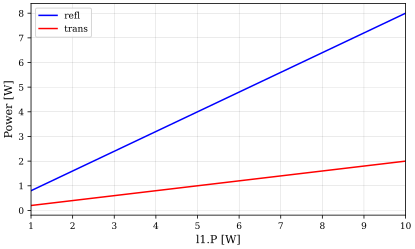

In [62]:
out = simple_mirror.run()
out.plot();

In [112]:
print(out.outputs)

('refl', 'trans')


In [114]:
print(out["refl"])

[0.8   0.872 0.944 1.016 1.088 1.16  1.232 1.304 1.376 1.448 1.52  1.592
 1.664 1.736 1.808 1.88  1.952 2.024 2.096 2.168 2.24  2.312 2.384 2.456
 2.528 2.6   2.672 2.744 2.816 2.888 2.96  3.032 3.104 3.176 3.248 3.32
 3.392 3.464 3.536 3.608 3.68  3.752 3.824 3.896 3.968 4.04  4.112 4.184
 4.256 4.328 4.4   4.472 4.544 4.616 4.688 4.76  4.832 4.904 4.976 5.048
 5.12  5.192 5.264 5.336 5.408 5.48  5.552 5.624 5.696 5.768 5.84  5.912
 5.984 6.056 6.128 6.2   6.272 6.344 6.416 6.488 6.56  6.632 6.704 6.776
 6.848 6.92  6.992 7.064 7.136 7.208 7.28  7.352 7.424 7.496 7.568 7.64
 7.712 7.784 7.856 7.928 8.   ]


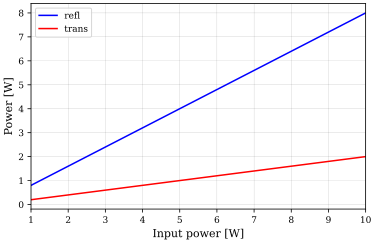

In [123]:
import matplotlib.pyplot as plt
plt.plot(out.x[0], out["refl"],label='refl')
plt.plot(out.x[0], out["trans"],label='trans')
plt.ylabel('Power [W]')
plt.xlabel('Input power [W]')
plt.legend()
plt.show()

# <font color='red'> TASK: Change the reflectance and transmission to 50%-50% and regenerate the plots <font

# Adding complexity

## (i) Radiation pressure on suspended mirror

<img src="https://finesse.ifosim.org/docs/develop/_images/radiation_pressure.svg" width="400"/>

In [51]:
suspended_mirror = finesse.Model()
suspended_mirror.parse(
    """
    # Optical setup: laser, space and mirror:
    l l1 P=1
    s s1 l1.p1 m1.p1 L=1
    m m1 R=1 T=0

    # Define a pendulum for our mirror, with a z-motion resonance at 10Hz
    # and Q factor of 1000
    pendulum sus1 m1.mech mass=1 fz=10 Qz=1000

    # Measure the mirror's longitudinal motion
    xd m1_z m1.mech.z

    # Set a signal frequency to activate the signal simulation
    # (needed for radiation pressure effects to be observed)
    fsig(1)

    # Generate amplitude modulation at the laser
    sgen sig l1.amp

    # Sweep the frequency of the amplitude modulation
    xaxis(fsig.f, log, 1, 100, 400)
    """
)

Pendulum is one of the few mechanical model support available in Finesse. There are various 'detectors' available in Finesse. So far we have seen power detectors (pd) and positions detectors(xd). 

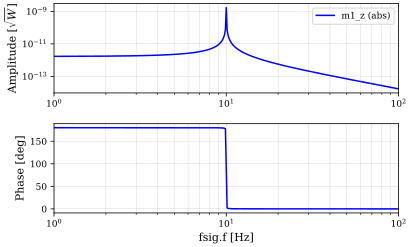

In [124]:
out = suspended_mirror.run()
out.plot(log=True);